# Example of RC beam optimal design

## Requirements

 - python3
 - cma python package: install via pip https://pypi.org/project/cma/#description


In [1]:
# problem: rectangular cross-section beam
b0 = .15 # thickness
h0 = .4  # height

rec = 0.03

L = 1.5 # length
    
gamma = 25e3 # specific weight of concrete
qsc = 15e3    # N/m load

fck = 25e6
fyk = 400e6


In [2]:
# import CMA-ES package
import cma
from math import sqrt

In [3]:
def structAnalysis(x):
    
    b = x[0]
    h = x[1]
    
    qpp = b * h * gamma
    print(qpp)
    Moment = (qsc + qpp) * L**2.0 / 8.0
    return Moment

In [4]:
def steelDesign(x,M):
    fcd = fck/1.5
    fyd = fyk/1.15
      
    b = x[0]
    h = x[1]
    d = h-rec

    Md   = M
    Mcrd = 0.251 * b * d**2 * fcd

    mud = Md/(b*d**2*fcd)
    
    if Md < Mcrd:

        omega_pos = (-1+sqrt(1-4*(-1/1.7)*(-mud)) ) / (2*(-1/1.7))
        omega_neg = (-1-sqrt(1-4*(-1/1.7)*(-mud)) ) / (2*(-1/1.7))
        omega = omega_neg 

        Ast = omega * b*d*fcd / fyd
        Asc = 0.0
    else:
        DeltaM = Md - Mcrd
        Asc = DeltaM / ( (d-rec)*fyd )
        Ast = 0.306 * b * d * fcd / fyd + DeltaM / ( (d-rec)*fyd ) 
    return Ast, Asc

In [5]:
def costFun(x):
    
    M = structAnalysis(x)
    
    # compute steel area
    Ast, Asc = steelDesign( x, M)
    
    print("x: ", x, " / Ast: ", Ast , " Asc: ", Asc)

    # compute cost
    f = L * ( Ast + Asc )
    return f

In [6]:

x0 = [b0, h0]  # initial solution

M=structAnalysis(x0)

print("moment: ", M)

Ast,Asc = steelDesign(x0,M)
print("Steel: Ast: ", Ast , " Asc: ", Asc)

fun = costFun  # we could use `functools.partial(cma.ff.elli, cond=1e4)` to change the condition number to 1e4
sigma0 = .01    # initial standard deviation to sample new solutions
xopt, es = cma.fmin2(fun, x0, sigma0, {'bounds': [ [.1, .1], None]} )

1500.0
moment:  4640.625
Steel: Ast:  0.004484586302909503  Asc:  0.0
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=156750, Wed May  3 10:32:38 2023)
1672.8954760652782
x:  [0.16500448 0.4055394 ]  / Ast:  0.00501146307497299  Asc:  0.0
1493.754487042404
x:  [0.1496627  0.39923227]  / Ast:  0.0044649970185607485  Asc:  0.0
1538.079778293218
x:  [0.15072837 0.40817261]  / Ast:  0.004607599612621166  Asc:  0.0
1598.3424436766088
x:  [0.15633979 0.40894067]  / Ast:  0.00479019529378147  Asc:  0.0
1514.028114958669
x:  [0.15141607 0.39996497]  / Ast:  0.004526802176668248  Asc:  0.0
1497.727458416297
x:  [0.15195845 0.39424658]  / Ast:  0.004471821000802652  Asc:  0.0
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 6.697495527841123e-03 1.0e+00 7.54e-03  6e-03  7e-03 0:00.0
1518.33978823772
x:  [0.15345791 0.39576709]  / Ast:  0.004535431215176474  Asc:  0.0
1508.3506500514177
x:  [0.15575904 0.3873549 ]  / Ast:  0.004496406384707787  Asc:  0.

382.54928265891937
x:  [0.12741831 0.12009241]  / Ast:  0.0007667137000558228  Asc:  0.0
380.23043522193313
x:  [0.12618551 0.12053061]  / Ast:  0.0007630173087685752  Asc:  0.0
378.9453077687655
x:  [0.12550503 0.12077454]  / Ast:  0.0007609597147965617  Asc:  0.0
379.98783765587996
x:  [0.12603049 0.12060188]  / Ast:  0.0007627570645923461  Asc:  0.0
377.6401380269887
x:  [0.12479123 0.12104701]  / Ast:  0.0007589830983008365  Asc:  0.0
383.6007996187109
x:  [0.12798587 0.11988848]  / Ast:  0.0001687117835133328  Asc:  2.7699134871883003e-08
382.5349867577289
x:  [0.12746021 0.12004844]  / Ast:  0.0001684194024393982  Asc:  1.291934828636382e-07
380.7351736984449
x:  [0.12644749 0.12044056]  / Ast:  0.0007638517791700532  Asc:  0.0
382.9526811857848
x:  [0.1276891 0.1199641]  / Ast:  0.00016858610050847768  Asc:  1.5159518811646043e-07
380.2101026639134
x:  [0.1261924  0.12051759]  / Ast:  0.00016750002311626352  Asc:  1.567885568050129e-08
379.7775283912817
x:  [0.12589786 0.1206621

354.0687520562525
x:  [0.11262639 0.12574983]  / Ast:  0.0007203161385177726  Asc:  0.0
354.8761980275465
x:  [0.11305972 0.12555353]  / Ast:  0.0001584092635068179  Asc:  6.519489520413775e-09
355.08963761818745
x:  [0.11317933 0.12549629]  / Ast:  0.0001585112512651248  Asc:  3.593640648803376e-08
353.4738534444152
x:  [0.11232981 0.12587001]  / Ast:  0.0007193028870820065  Asc:  0.0
356.09210849324586
x:  [0.11369199 0.12528309]  / Ast:  0.00015887682686333975  Asc:  3.907149612727876e-08
354.96536764171776
x:  [0.1131166  0.12552194]  / Ast:  0.000158467682187413  Asc:  3.76582615402352e-08
354.9898942785009
x:  [0.11311643 0.1255308 ]  / Ast:  0.00015844756820464038  Asc:  3.083275931318933e-09
355.05422742844576
x:  [0.11313925 0.12552823]  / Ast:  0.0007218899439977322  Asc:  0.0
355.0104138598233
x:  [0.11312228 0.12553157]  / Ast:  0.0007217911993369722  Asc:  0.0
355.0032390904354
x:  [0.11312817 0.12552249]  / Ast:  0.00015846369542278253  Asc:  1.6548497542599178e-08
354.75

343.2937315374091
x:  [0.10720261 0.12809155]  / Ast:  0.00015419444057523316  Asc:  8.416474649064818e-09
343.00520278761746
x:  [0.10705276 0.12816305]  / Ast:  0.0007018755473932848  Asc:  0.0
343.4726342058245
x:  [0.1072955  0.12804736]  / Ast:  0.0001542670496166306  Asc:  1.695585120770093e-08
343.1590145347396
x:  [0.10713147 0.12812632]  / Ast:  0.0007021241048112508  Asc:  0.0
343.3640184299431
x:  [0.10723924 0.12807402]  / Ast:  0.00015422329275783354  Asc:  1.2157978167315636e-08
343.27246394968705
x:  [0.10719141 0.12809701]  / Ast:  0.00015418543158530278  Asc:  6.952565433912722e-09
343.10417639054265
x:  [0.10710519 0.12813727]  / Ast:  0.00015411971440676818  Asc:  2.010084737530995e-09
343.471744902852
x:  [0.10729527 0.12804731]  / Ast:  0.00015426722204632908  Asc:  1.754876957940397e-08
343.19631062808475
x:  [0.10715243 0.12811518]  / Ast:  0.00015415577720745034  Asc:  4.814627867665485e-09
343.30978292439033
x:  [0.10721134 0.12808711]  / Ast:  0.00015420186793

339.81886144417825
x:  [0.10546106 0.12888885]  / Ast:  0.0001529155387443861  Asc:  1.4596501516681367e-09
339.86511174514453
x:  [0.10548196 0.12888085]  / Ast:  0.0006966327561966065  Asc:  0.0
339.9587412008138
x:  [0.10553148 0.12885586]  / Ast:  0.00015296819865448554  Asc:  3.055661018014183e-09
340.18155577471526
x:  [0.10564209 0.12880531]  / Ast:  0.00015304841075497433  Asc:  1.2422591103577235e-09
339.9477555151647
x:  [0.1055243  0.12886046]  / Ast:  0.0006967654756561989  Asc:  0.0
340.20863092917295
x:  [0.10565549 0.12879923]  / Ast:  0.00015305805660997013  Asc:  9.028011906061838e-10
340.1556067192633
x:  [0.10563007 0.12881014]  / Ast:  0.00015304105731319198  Asc:  3.820317341591038e-09
339.4481028490077
x:  [0.10527431 0.12897661]  / Ast:  0.0006959332961183074  Asc:  0.0
340.01980444723836
x:  [0.10556105 0.1288429 ]  / Ast:  0.00015298849205469574  Asc:  5.451942373307876e-10
339.9056504330014
x:  [0.10550437 0.12886884]  / Ast:  0.00015294733514579248  Asc:  1.4

338.057366727343
x:  [0.10458227 0.12929816]  / Ast:  0.0006936009428883063  Asc:  0.0
338.066806224036
x:  [0.10458828 0.12929433]  / Ast:  0.00015227400478657816  Asc:  3.5932324740781014e-09
338.26825334889145
x:  [0.10468891 0.12924703]  / Ast:  0.0001523487137355513  Asc:  4.4168434174604126e-09
338.0939293715875
x:  [0.10460145 0.12928843]  / Ast:  0.00015228318258198481  Asc:  2.6539828007217126e-09
337.92437272128376
x:  [0.10451573 0.12932958]  / Ast:  0.0006933799299711228  Asc:  0.0
338.15457425718034
x:  [0.10463052 0.1292757 ]  / Ast:  0.0006937644505858821  Asc:  0.0
338.02596482018635
x:  [0.10456732 0.12930463]  / Ast:  0.00015225754884691672  Asc:  1.868844899062147e-09
337.96127433541875
x:  [0.10453474 0.12932018]  / Ast:  0.0001522329263366245  Asc:  8.568535221543473e-10
338.09075740585143
x:  [0.10460103 0.12928774]  / Ast:  0.00015228469584371214  Asc:  5.843898732796498e-09
338.0857372479762
x:  [0.1045978  0.12928981]  / Ast:  0.00015228116225832607  Asc:  3.83

335.98961334959915
x:  [0.10355433 0.12978293]  / Ast:  0.00015150739148608847  Asc:  4.44318527306798e-10
335.99747228437616
x:  [0.10355798 0.12978139]  / Ast:  0.0006901503746501102  Asc:  0.0
336.071351688262
x:  [0.10359497 0.12976358]  / Ast:  0.00015153760289165816  Asc:  5.908182217774945e-10
335.9751510659428
x:  [0.10354697 0.12978657]  / Ast:  0.0006901125858066323  Asc:  0.0
335.9814104563435
x:  [0.10354944 0.1297859 ]  / Ast:  0.0006901262965393469  Asc:  0.0
336.0717342314889
x:  [0.10359525 0.12976338]  / Ast:  0.00015153795599731523  Asc:  8.435745557871382e-10
335.9031760647059
x:  [0.10351091 0.12980397]  / Ast:  0.0006899935482616592  Asc:  0.0
336.0898577823417
x:  [0.10360403 0.12975938]  / Ast:  0.00015154411660377184  Asc:  2.357899519257097e-10
336.04082095733133
x:  [0.10358    0.12977055]  / Ast:  0.00015152680210981073  Asc:  1.1117123225780315e-09
335.9946538215025
x:  [0.10355662 0.12978201]  / Ast:  0.0006901454462738295  Asc:  0.0
336.0267971728281
x:  [

329.4512971551168
x:  [0.10029086 0.13139833]  / Ast:  0.0006793072534228144  Asc:  0.0
329.3445733869437
x:  [0.10029951 0.13134444]  / Ast:  0.00014911932638009777  Asc:  7.798031488976073e-08
329.0796131213697
x:  [0.10028382 0.1312593 ]  / Ast:  0.00014928706970369037  Asc:  3.942230474744291e-07
329.55238290349394
x:  [0.10036834 0.13133719]  / Ast:  0.0006793378808211641  Asc:  0.0
329.6071675037491
x:  [0.10047196 0.13122354]  / Ast:  0.0001493170124072633  Asc:  1.9751416615319536e-07
329.9440280602802
x:  [0.10057041 0.13122907]  / Ast:  0.00014928574798363898  Asc:  1.1982606975348414e-08
329.4449315151054
x:  [0.10030255 0.13138049]  / Ast:  0.0006792219228910612  Asc:  0.0
329.40401533108184
x:  [0.10036698 0.13127983]  / Ast:  0.00014923002484111604  Asc:  1.8349595338622236e-07
329.60230639561144
x:  [0.10037264 0.13135146]  / Ast:  0.0006795240223290777  Asc:  0.0
329.28189116050055
x:  [0.10029464 0.13132581]  / Ast:  0.00014915628676671604  Asc:  1.4956381172035745e-07

329.0632394329457
x:  [0.10013296 0.13145052]  / Ast:  0.00014894962555141682  Asc:  1.986816135562352e-11
329.06171377533644
x:  [0.10013224 0.13145085]  / Ast:  0.00014894914824266673  Asc:  1.2422794598706415e-10
329.0608842004781
x:  [0.1001318 0.1314511]  / Ast:  0.00014894876483115193  Asc:  3.3583247479992135e-11
329.06176767021424
x:  [0.10013224 0.13145088]  / Ast:  0.00014894909293718282  Asc:  3.467519882431874e-11
329.06184948540823
x:  [0.10013232 0.13145081]  / Ast:  0.0001489492085783557  Asc:  1.3621692375889182e-10
329.06164777250603
x:  [0.10013216 0.13145094]  / Ast:  0.0006784847398349004  Asc:  0.0
329.0585052985907
x:  [0.10013065 0.13145166]  / Ast:  0.00014894791584371214  Asc:  7.169041950073631e-11
329.0600687136646
x:  [0.1001314 0.1314513]  / Ast:  0.0001489484537615135  Asc:  2.2805491880430928e-11
329.06013033602187
x:  [0.10013144 0.13145127]  / Ast:  0.0001489485029446708  Asc:  5.41713394513133e-11
329.05951621649456
x:  [0.10013112 0.13145144]  / Ast: 

328.88671590862725
x:  [0.10004677 0.13149319]  / Ast:  0.00014888551058877013  Asc:  1.5244150506270429e-09
328.8985251239804
x:  [0.10005178 0.13149132]  / Ast:  0.0006782106534974434  Asc:  0.0
328.9002778055571
x:  [0.10005421 0.13148883]  / Ast:  0.00014889234621434988  Asc:  3.68071966030618e-09
328.91717426516686
x:  [0.10006047 0.13148736]  / Ast:  0.0006782445247346942  Asc:  0.0
328.91127522599675
x:  [0.1000585  0.13148759]  / Ast:  0.00014889383376694642  Asc:  6.040663653966871e-10
328.91077330424895
x:  [0.10005884 0.13148694]  / Ast:  0.00014889501091509204  Asc:  2.225846340754637e-09
328.8943327665408
x:  [0.10005176 0.13148968]  / Ast:  0.0001488912169079892  Asc:  4.957049976943028e-09
328.8881065355341
x:  [0.10004998 0.13148953]  / Ast:  0.0001488918739018787  Asc:  8.48265446013683e-09
328.87810480101797
x:  [0.10004061 0.13149784]  / Ast:  0.0006781819425124342  Asc:  0.0
328.88167203705444
x:  [0.10004398 0.13149484]  / Ast:  0.00014888291652540722  Asc:  6.6084

328.831705393344
x:  [0.10001919 0.13150744]  / Ast:  0.0006780967389580261  Asc:  0.0
328.8330572415115
x:  [0.1000199  0.13150705]  / Ast:  0.00014886446575059964  Asc:  1.3337379608285555e-10
328.8326310213333
x:  [0.10001965 0.13150721]  / Ast:  0.00014886420570757244  Asc:  1.1819789892199634e-11
328.83524724637897
x:  [0.10002102 0.13150645]  / Ast:  0.00014886537321689283  Asc:  2.478903313739295e-10
328.8306694345011
x:  [0.10001863 0.13150777]  / Ast:  0.0006780952538379103  Asc:  0.0
328.8312454893365
x:  [0.10001899 0.13150753]  / Ast:  0.00014886372871574416  Asc:  5.493317001618982e-11
328.8339286499484
x:  [0.10002032 0.13150686]  / Ast:  0.0001488647474793187  Asc:  8.452380648672076e-11
328.83286806773185
x:  [0.10001979 0.13150712]  / Ast:  0.00014886434377827922  Asc:  7.16243985171083e-11
328.8292053435135
x:  [0.1000179  0.13150814]  / Ast:  0.0006780928510471412  Asc:  0.0
328.8308387984896
x:  [0.10001872 0.13150771]  / Ast:  0.0006780954880372442  Asc:  0.0
328.8

328.8071140848126
x:  [0.10000718 0.13151341]  / Ast:  0.00014885489292797358  Asc:  1.775368899699122e-10
328.8070948224344
x:  [0.10000707 0.13151354]  / Ast:  0.0006780553845384692  Asc:  0.0
328.8092756386543
x:  [0.10000832 0.13151277]  / Ast:  0.0001488558834634296  Asc:  4.034062850759382e-10
328.8058794787935
x:  [0.10000648 0.13151383]  / Ast:  0.0006780532741762075  Asc:  0.0
328.80567899803395
x:  [0.1000064  0.13151386]  / Ast:  0.0006780528607267487  Asc:  0.0
328.80857682636474
x:  [0.10000798 0.13151294]  / Ast:  0.0001488556269653676  Asc:  4.0621488822979927e-10
328.80657720942014
x:  [0.10000695 0.13151349]  / Ast:  0.00014885478458422687  Asc:  2.852489889217574e-10
328.81243441322675
x:  [0.10001003 0.13151178]  / Ast:  0.00014885742990758342  Asc:  8.5119042035384e-10
328.80802504546705
x:  [0.1000076  0.13151321]  / Ast:  0.00014885517880249534  Asc:  1.1617895626820068e-10
328.8089486825326
x:  [0.10000817 0.13151283]  / Ast:  0.0001488557924338402  Asc:  4.39199

328.80190133421456
x:  [0.10000453 0.1315148 ]  / Ast:  0.0006780465410967801  Asc:  0.0
328.8021912427577
x:  [0.10000471 0.13151468]  / Ast:  0.00014885295875352662  Asc:  4.592579800798836e-11
328.80295701282097
x:  [0.10000511 0.13151446]  / Ast:  0.00014885330566016564  Asc:  1.2117291421044115e-10
328.80332170643703
x:  [0.10000531 0.13151435]  / Ast:  0.00014885347342288301  Asc:  1.6004348746901477e-10
328.8031294034541
x:  [0.10000519 0.13151442]  / Ast:  0.00014885335887767465  Asc:  1.0851237515933639e-10
328.8016446412317
x:  [0.10000443 0.13151484]  / Ast:  0.00014885272059909896  Asc:  3.4767536785697313e-12
328.80131681892453
x:  [0.10000428 0.1315149 ]  / Ast:  0.00014885262739104392  Asc:  3.70610544067043e-11
328.8024071113795
x:  [0.10000486 0.13151457]  / Ast:  0.00014885313517682978  Asc:  1.606931898413394e-10
328.8008235371587
x:  [0.1000039 0.1315152]  / Ast:  0.0006780452608467943  Asc:  0.0
328.8013918589138
x:  [0.10000431 0.13151489]  / Ast:  0.0001488526313

328.8005093811361
x:  [0.10000387 0.13151511]  / Ast:  0.00014885230300394465  Asc:  6.972697000979366e-12
termination on tolupsigma=1e+20 (Wed May  3 10:32:39 2023)
final/bestever f-value = 2.232785e-04 2.232784e-04 after 3799/3795 evaluations
incumbent solution: [0.10000387091966728, 0.13151511290808343]
std deviation: [1.3388557626302936e-05, 8.6886935275253e-08]


In [7]:
dict(es.result._asdict())

{'xbest': array([0.10000386, 0.13151512]),
 'fbest': 0.00022327844245424976,
 'evals_best': 3795,
 'evaluations': 3799,
 'iterations': 633,
 'xfavorite': array([0.10000387, 0.13151511]),
 'stds': array([1.33885576e-05, 8.68869353e-08]),
 'stop': {'tolupsigma': 1e+20}}

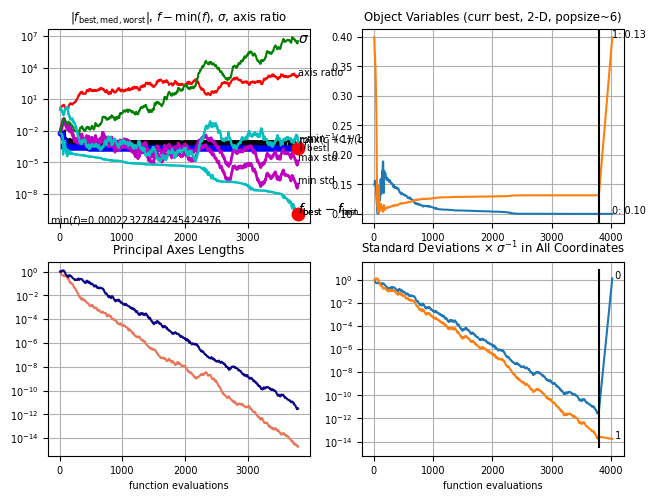

In [8]:
es.plot();